In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression



In [2]:
test = pd.read_excel('final.xls')

In [3]:
test.shape

(3142, 23)

In [4]:
test.dtypes

State                                         object
County                                        object
2010 Census Population                        object
Population Estimate, 2014                     object
Food & Retail Tax 2014                       float64
Fast Food 2009                                 int64
Fast Food 2014                                 int64
Fast Food % Change 09-14                     float64
Full Service 2009                              int64
Full Service 2014                              int64
Full Service % Change 09-14                  float64
Grocery Store 09                               int64
Grocery Store 2014                             int64
Grocery Store % Change 09-14                 float64
Supercenters & Club Stores 2009                int64
Supercenters & Club Stores 2014                int64
Supercenters & Club Stores % Change 09-14    float64
Convenience Stores 2009                        int64
Convenience Stores 2014                       

In [63]:
test.isnull().sum()

State                                           0
County                                          0
2010 Census Population                       3107
Population Estimate, 2014                       0
Food & Retail Tax 2014                          0
Fast Food 2009                                  0
Fast Food 2014                                  0
Fast Food % Change 09-14                       51
Full Service 2009                               0
Full Service 2014                               0
Full Service % Change 09-14                    36
Grocery Store 09                                0
Grocery Store 2014                              0
Grocery Store % Change 09-14                   20
Supercenters & Club Stores 2009                 0
Supercenters & Club Stores 2014                 0
Supercenters & Club Stores % Change 09-14     140
Convenience Stores 2009                         0
Convenience Stores 2014                         0
Convenience Stores % Change 09-14              24


In [64]:
test.shape

(3142, 25)

In [15]:
test.dropna(axis=0, how='any', thresh=None, subset=None)

,State,County,2010 Census Population,"Population Estimate, 2014",Food & Retail Tax 2014,Fast Food 2009,Fast Food 2014,Fast Food % Change 09-14,Full Service 2009,Full Service 2014,...,Grocery Store % Change 09-14,Supercenters & Club Stores 2009,Supercenters & Club Stores 2014,Supercenters & Club Stores % Change 09-14,Convenience Stores 2009,Convenience Stores 2014,Convenience Stores % Change 09-14,Specialized Food Stores 2009,Specialized Food Stores 2014,Specialized Food Stores % Change 09-14
90,Alaska,Skagway,968.0,"1,031",0.0,6,2,-66.666667,8,7,...,-25.0,0,0,0.0,6,6,0.0,0,0,0.0
94,Alaska,Yakutat,662.0,642,0.0,1,0,-100.000000,0,0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
271,Colorado,Hinsdale,843.0,778,0.0,1,0,-100.000000,7,6,...,100.0,0,0,0.0,2,3,50.0,0,0,0.0
548,Hawaii,Kalawao,90.0,89,4.0,0,0,0.000000,0,0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1632,Montana,Petroleum,494.0,487,0.0,0,0,0.000000,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1649,Montana,Treasure,718.0,693,0.0,0,0,0.000000,2,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1656,Nebraska,Arthur,460.0,454,0.0,0,0,0.000000,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1657,Nebraska,Banner,690.0,751,0.0,0,0,0.000000,0,0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1658,Nebraska,Blaine,478.0,505,0.0,0,0,0.000000,1,1,...,0.0,0,0,0.0,1,0,-100.0,0,0,0.0
1691,Nebraska,Grant,614.0,617,0.0,0,0,0.000000,1,1,...,0.0,0,0,0.0,1,1,0.0,0,0,0.0


In [20]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['Fast Food 2009']
feature_cols2 = ['Convenience Stores 2009']
X = test[feature_cols]
y = test[feature_cols2]
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
assorted_pred_class

array([13, 26, 13, ..., 13, 11,  6], dtype=int64)

In [22]:
test['assorted_pred_class'] = assorted_pred_class

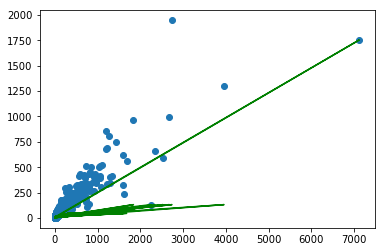

In [23]:
plt.scatter(test[feature_cols], test[feature_cols2])
plt.plot(test[feature_cols], test.assorted_pred_class, color='green');

In [24]:
logreg.predict_proba(X)

C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[  5.50485828e-18,   4.02983904e-09,   4.48243923e-06, ...,
          1.98030164e-04,   3.78625562e-09,   2.81163101e-04],
       [  4.90451560e-64,   5.30785276e-31,   2.00621540e-19, ...,
          3.42427422e-04,   7.95116196e-09,   4.80317507e-04],
       [  5.71668221e-13,   9.30903031e-07,   1.19877923e-04, ...,
          1.70899336e-04,   3.19858133e-09,   2.42965967e-04],
       ..., 
       [  3.39197506e-15,   8.34117125e-08,   2.80059006e-05, ...,
          1.83653661e-04,   3.47002705e-09,   2.60944249e-04],
       [  1.21459169e-09,   3.37021781e-05,   1.03021160e-03, ...,
          1.48970649e-04,   2.74880137e-09,   2.11978186e-04],
       [  8.48735462e-06,   2.03137051e-03,   1.14995071e-02, ...,
          1.16421488e-04,   2.11286802e-09,   1.65833870e-04]])

In [50]:
test['assorted_pred_prob'] = assorted_pred_prob 
assorted_pred_prob = logreg.predict_proba(X)[:, 1]


C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


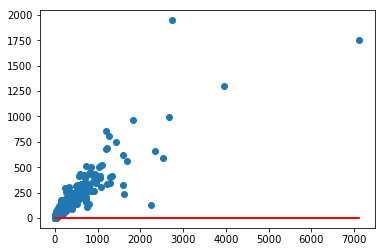

In [49]:

plt.scatter(test[feature_cols], test[feature_cols2])
plt.plot(test[feature_cols], test.assorted_pred_prob, color='red');

In [31]:
print (logreg.predict_proba(1))


[[  3.82364285e-02   7.33673820e-02   7.76740238e-02   7.99731473e-02
    6.44027473e-02   6.36580181e-02   5.49930836e-02   4.98227512e-02
    4.11749563e-02   3.37209040e-02   3.25014112e-02   3.18928999e-02
    2.13012635e-02   2.57069692e-02   2.15453558e-02   1.44984732e-02
    1.49535600e-02   1.14594649e-02   1.34729960e-02   1.18103796e-02
    9.67736436e-03   9.95979046e-03   8.27940621e-03   9.48017118e-03
    7.97675929e-03   6.01847897e-03   8.21194079e-03   6.05027471e-03
    6.05504026e-03   4.33302554e-03   4.41938955e-03   4.50405599e-03
    4.74315238e-03   4.48254656e-03   3.92072593e-03   2.66629741e-03
    3.46130654e-03   4.87987009e-03   2.44166054e-03   3.92791492e-03
    2.49834251e-03   2.14756270e-03   2.95528277e-03   3.08936705e-03
    1.31974565e-03   3.06325805e-03   2.25925140e-03   1.92192369e-03
    2.58395137e-03   2.78890017e-03   1.28105857e-03   2.42709637e-03
    1.92367596e-03   2.42519770e-03   2.40641919e-03   1.75511766e-03
    1.59485996e-03  

In [53]:
np.exp(1)

2.7182818284590451

In [54]:
np.log(2.258)

0.81447946572747032